# Netflix Content Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load dataset
file_path = "/content/netflix_titles.csv"
df = pd.read_csv(file_path)

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


from matplotlib import pyplot as plt
_df_0['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:

print("\nSummary Statistics:\n", df.describe(include='all'))
print("\nMissing Values:\n", df.isnull().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Summary Statistics:
        show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick J

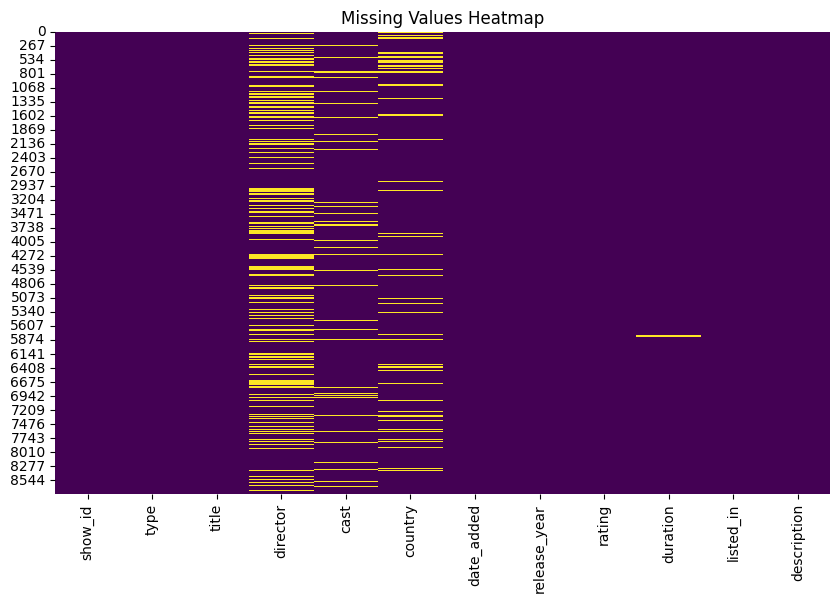

In [ ]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [33]:
num_null_cast = df['cast'].isnull().sum()
num_null_director = df['director'].isnull().sum()
num_null_country = df['country'].isnull().sum()

print(num_null_cast, num_null_director, num_null_country)


825 2634 831


### We see that the data for cast, director and country is missing in 825, 2684 and 831 entries

## Univariate analysis


Univariate Analysis:



<ipython-input-9-a48f1fd0cdfa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='coolwarm')


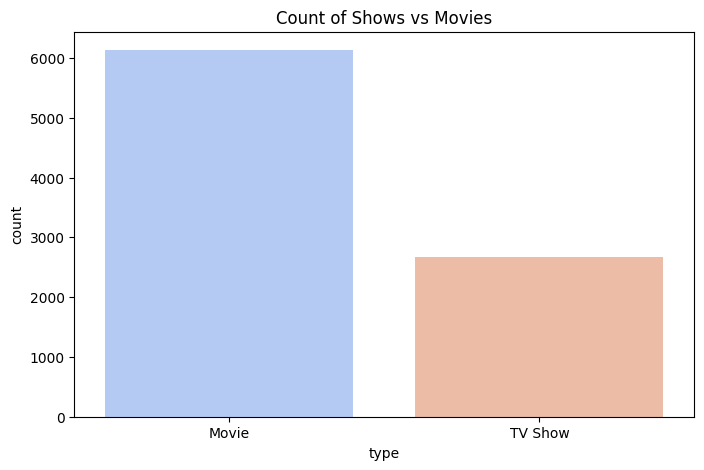

In [9]:
# Count of different types of content
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', palette='coolwarm')
plt.title("Count of Shows vs Movies")
plt.show()


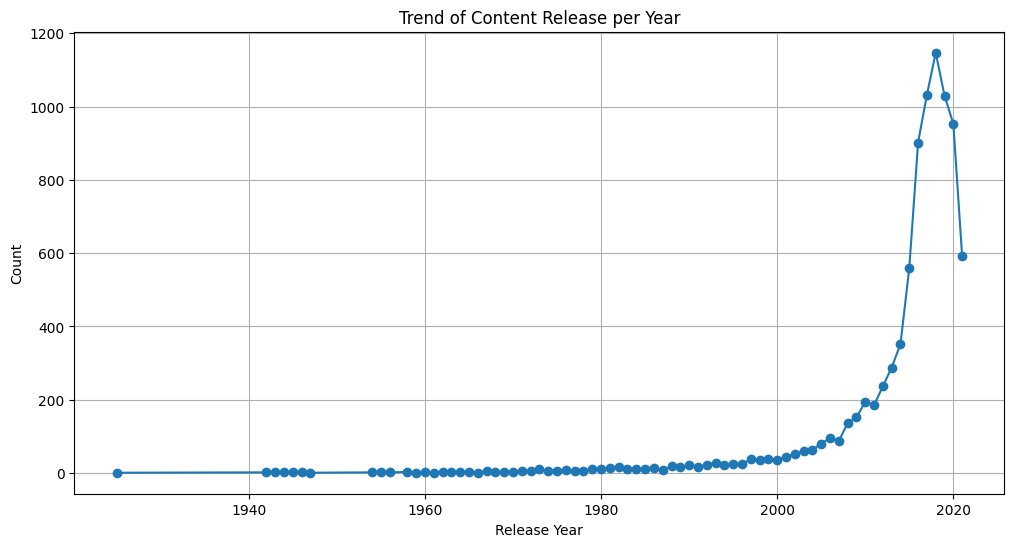

In [10]:
# Year-wise content addition trend
plt.figure(figsize=(12, 6))
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['release_year'].dropna().astype(int).value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Trend of Content Release per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.grid()
plt.show()

### We see that the number of content releases has been steadily rising, with rapid growth after 2000. However, their was a dip in this number after 2019. Possble explanation is the COVID-19 pandemic, which caused the entertainment industry to remain largely inoperative.

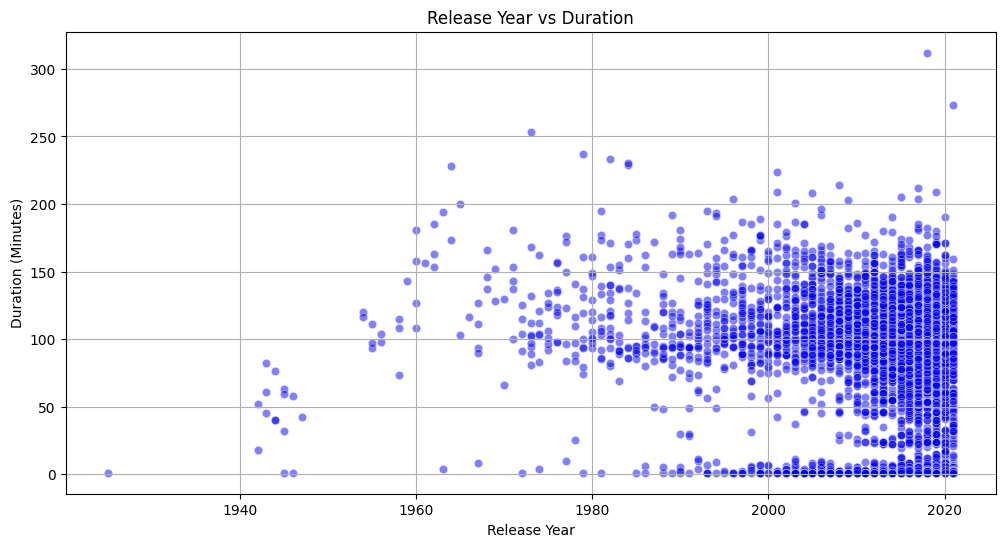

In [37]:

# Plot Release Year vs Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='release_year', y='duration', alpha=0.5, color='b')
plt.title("Release Year vs Duration")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes)")
plt.grid()
plt.show()

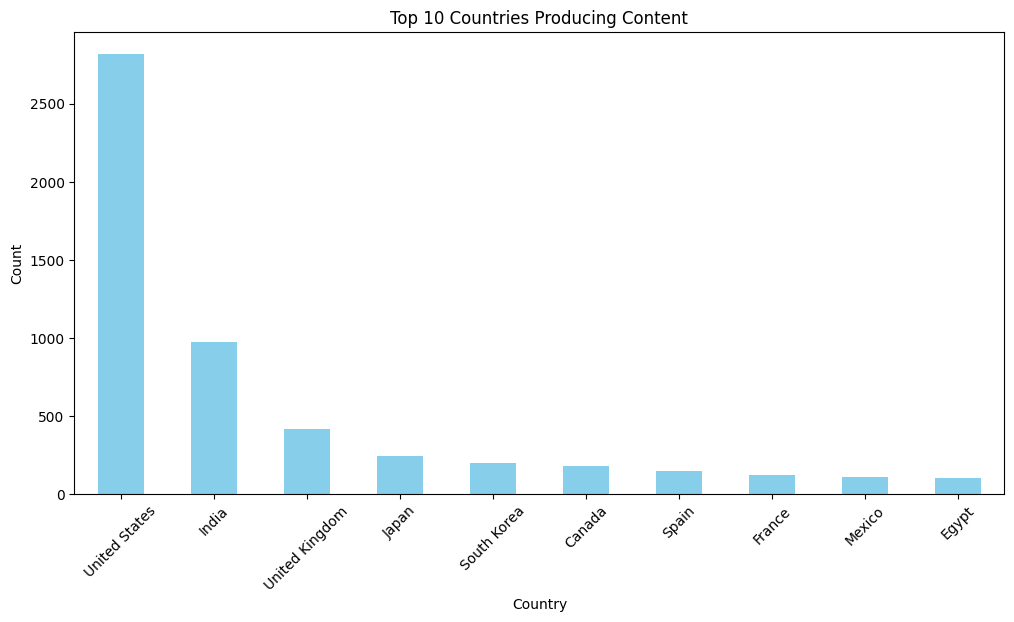

In [11]:
# Top 10 countries with most content
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries Producing Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-20-01f9d0edab2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis')


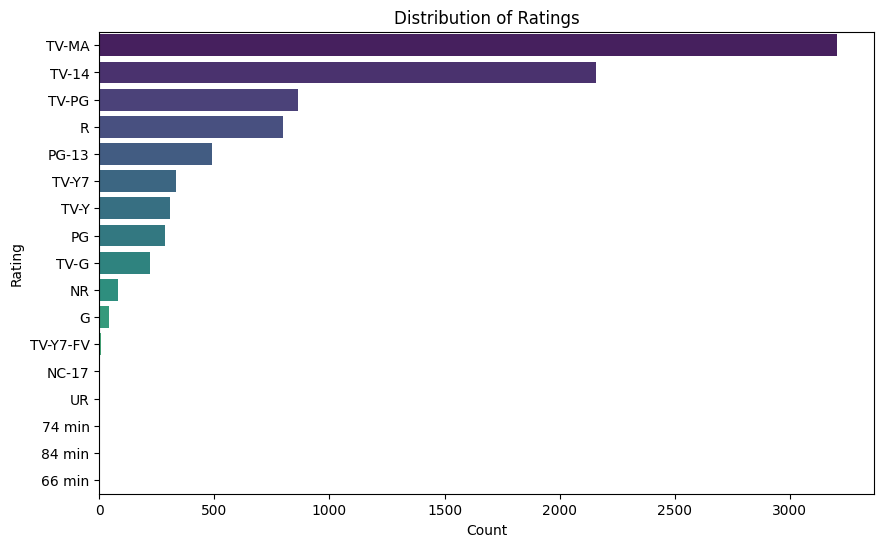

In [20]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

## Multivariate Analysis


Multivariate Analysis:



<ipython-input-35-ed65d9a2be7c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='release_year', palette='Set2')


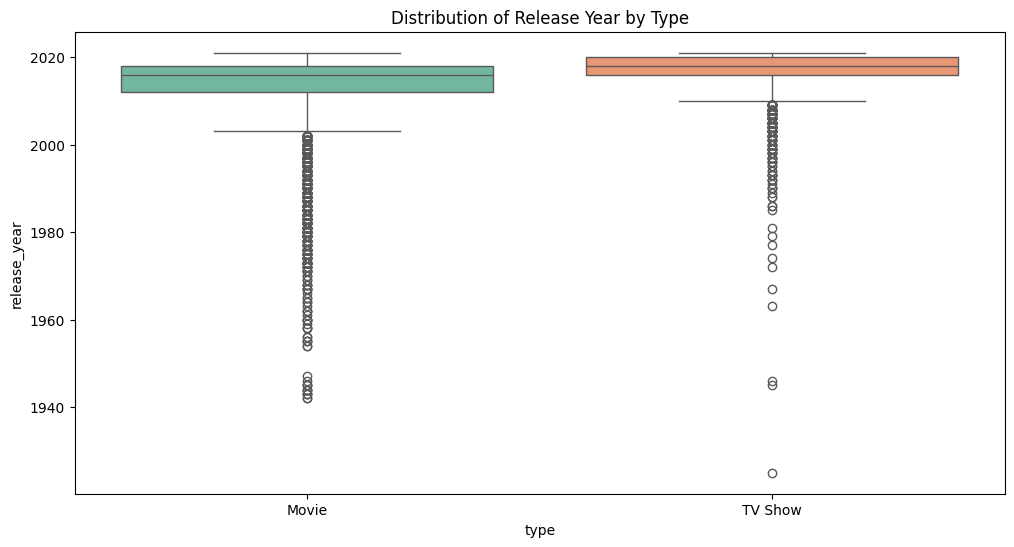

Lower bound: 2004.0, Upper bound: 2028.0
Number of outliers per type:
type
Movie      644
TV Show     75
Name: count, dtype: int64

Total number of outliers: 719


In [35]:
# Relationship between type and release year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='release_year', palette='Set2')
plt.title("Distribution of Release Year by Type")
plt.show()


# Compute IQR for release_year
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each type
outliers = df[(df['release_year'] < lower_bound) | (df['release_year'] > upper_bound)]
outlier_counts = outliers['type'].value_counts()

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print("Number of outliers per type:")
print(outlier_counts)
print(f"\nTotal number of outliers: {len(outliers)}")


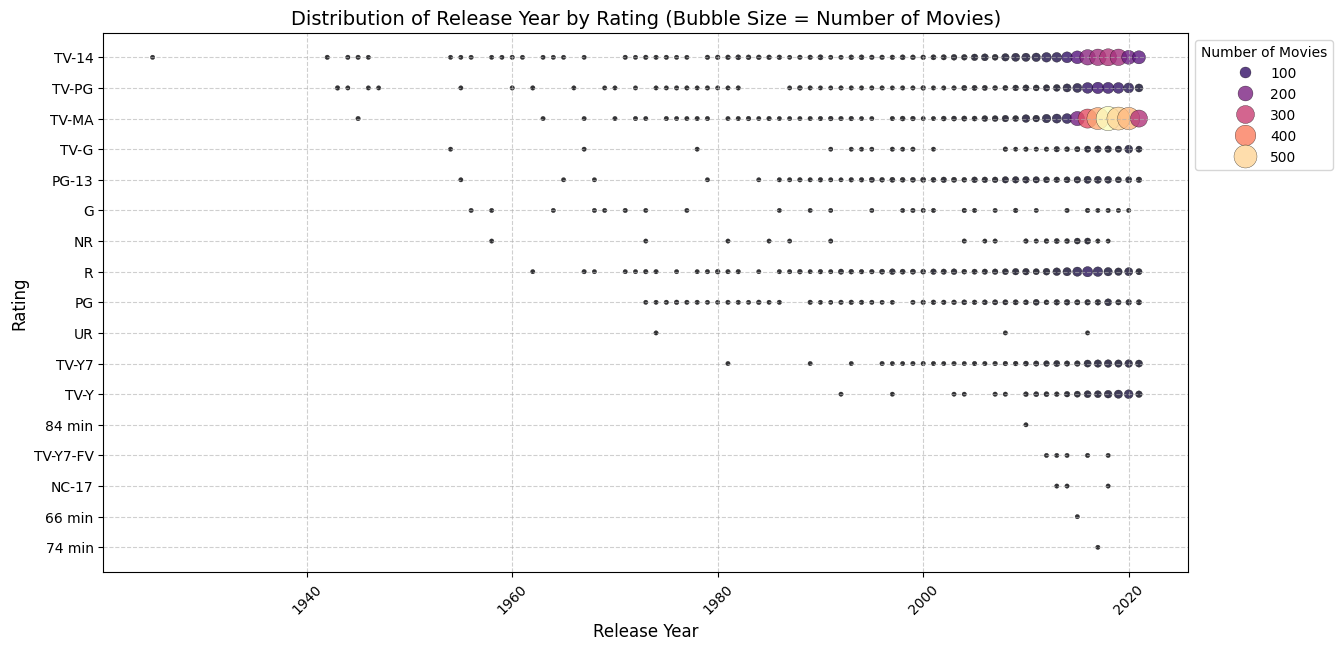

In [39]:
if 'rating' in df.columns:
    plt.figure(figsize=(14, 7))

    # Group by Release Year and Rating, then count the number of movies
    rating_year_counts = df.groupby(['release_year', 'rating']).size().reset_index(name='count')

    # Scatter plot with darker colors
    sns.scatterplot(data=rating_year_counts, x='release_year', y='rating', size='count',
                    sizes=(10, 300), alpha=0.8, palette='magma', hue='count', edgecolor='black')

    plt.title("Distribution of Release Year by Rating (Bubble Size = Number of Movies)", fontsize=14)
    plt.xlabel("Release Year", fontsize=12)
    plt.ylabel("Rating", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Number of Movies", bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


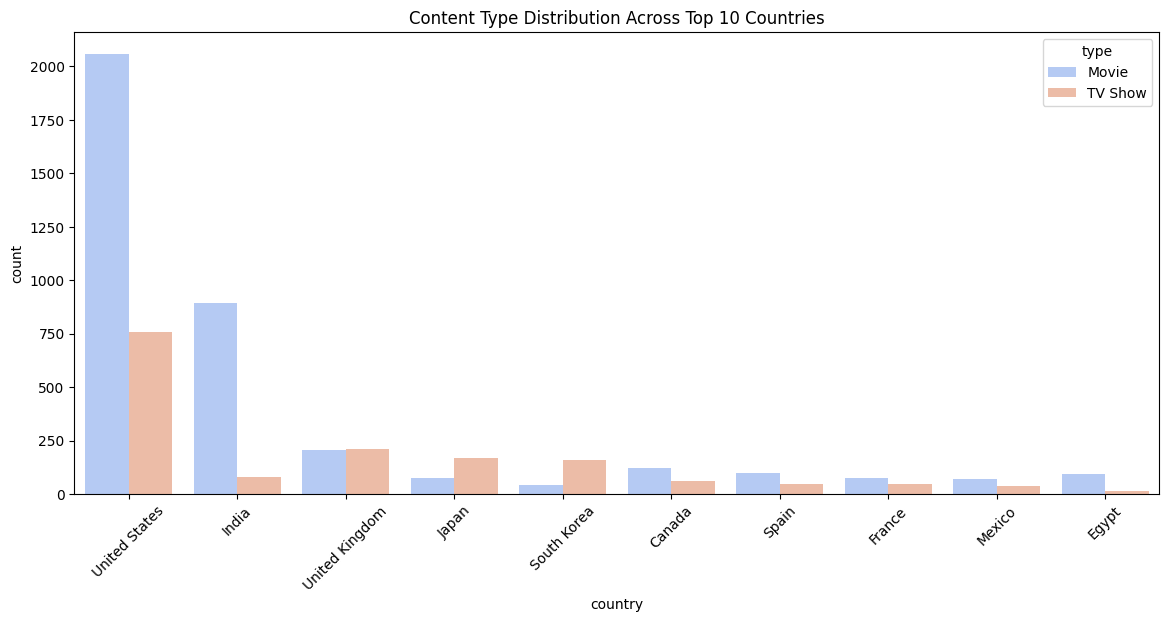

In [13]:
# Country vs Type Distribution
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='country', hue='type', order=df['country'].value_counts().head(10).index, palette='coolwarm')
plt.title("Content Type Distribution Across Top 10 Countries")
plt.xticks(rotation=45)
plt.show()


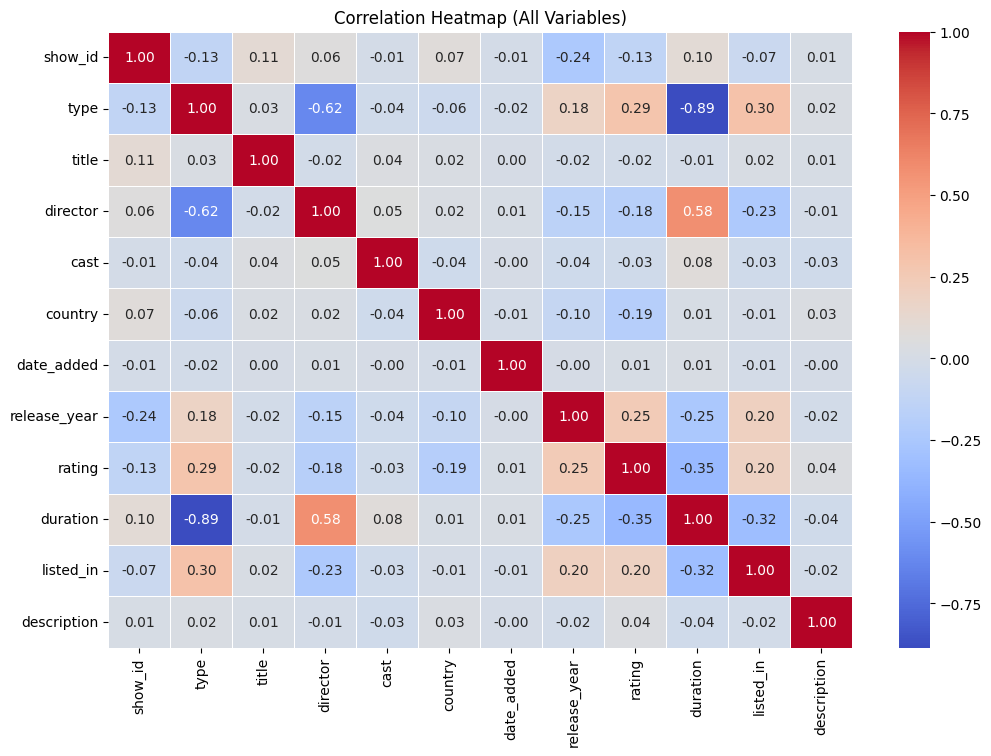

In [29]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (All Variables)")
plt.show()

### From the heatmap, we see that that their is a strong correlation between the duration of the content and the content type. Also, the director and the type of content they direct is also strongly correlated.

<ipython-input-40-385042dc04b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='type', y='duration', palette='dark')


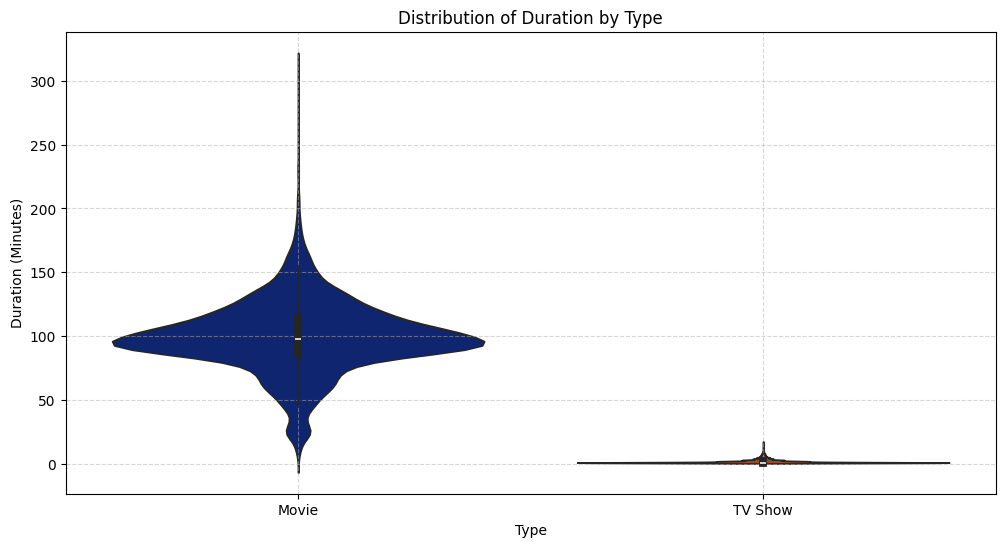

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='type', y='duration', palette='dark')
plt.title("Distribution of Duration by Type")
plt.xlabel("Type")
plt.ylabel("Duration (Minutes)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Since the TV Shows are not well represented in the same plot as movies, we will view it seperately

<ipython-input-42-f302cd2c82ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['type'] == 'TV Show'], x='type', y='duration', palette='dark')


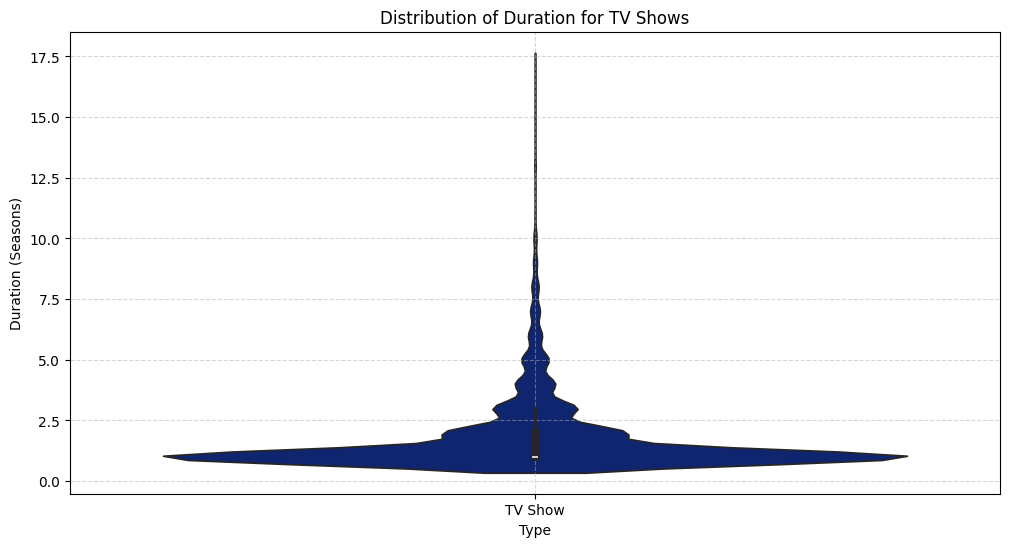

In [42]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['type'] == 'TV Show'], x='type', y='duration', palette='dark')
plt.title("Distribution of Duration for TV Shows")
plt.xlabel("Type")
plt.ylabel("Duration (Seasons)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Since the duration for TV shows is in seasons and not minutes, we might have have got an inaccurate correlation between the duration and type. So we will remove the TV shows, and then view the heatmap.

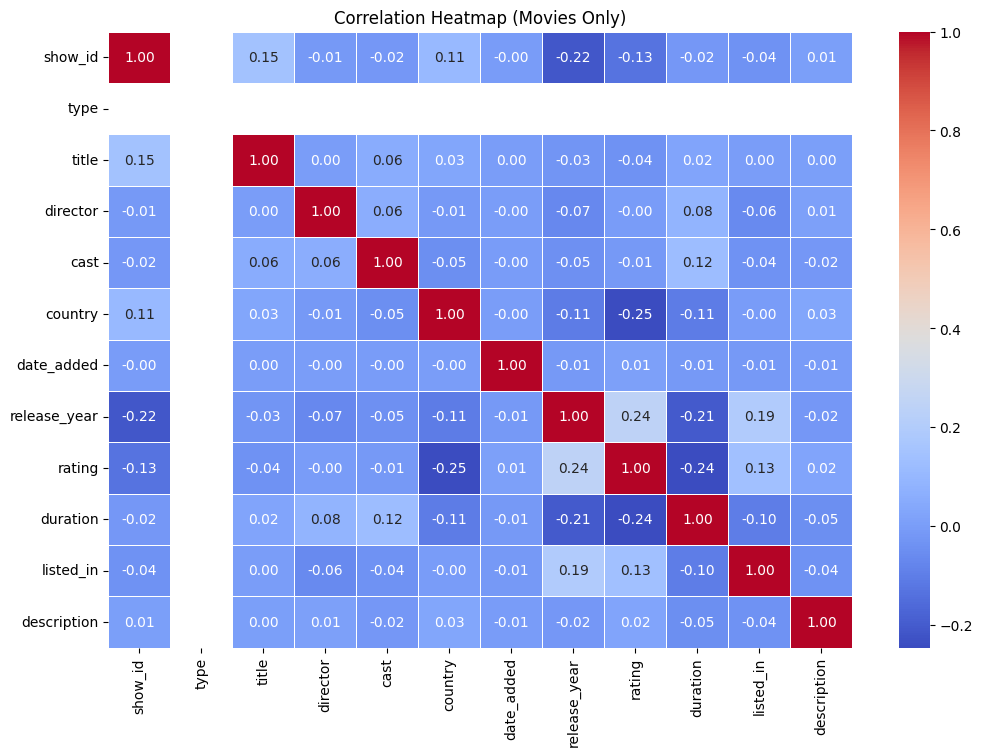

In [45]:
# Remove TV Shows from the dataset
df_movies = df[df['type'] == 'Movie'].copy()

# Encode categorical variables
df_encoded = df_movies.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (Movies Only)")
plt.show()


## From this, we observe tha thte correlation of duration with director was only due to type of show. Which means that for movies, there is insignificant relation between director and movie length

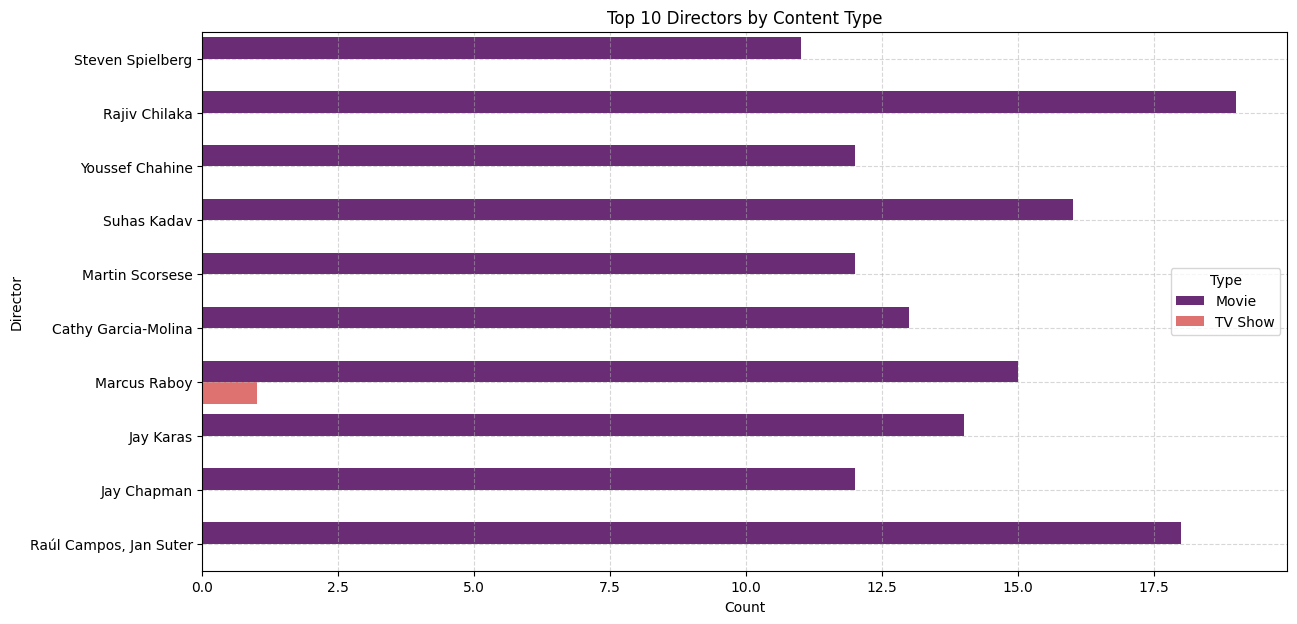

In [43]:
plt.figure(figsize=(14, 7))
top_directors = df['director'].value_counts().head(10).index
sns.countplot(data=df[df['director'].isin(top_directors)], y='director', hue='type', palette='magma')
plt.title("Top 10 Directors by Content Type")
plt.xlabel("Count")
plt.ylabel("Director")
plt.legend(title="Type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# Conclusion

### 1. Number of content being made has increased gradually over time, followed by a rapid increase after the 2000s
### 2. Most of the content is produced either in the United States or India
### 3. TV-MA and PG-13 appear more frequently than others, indicating Netflix's target audience. Also, TV Shows tend to have a wider spread in ratings compared to movies. Content targeted towards mature audiences (TV-MA) has increased significantly in recent years.
### 4. A few directors dominate the dataset, while most appear only once or twice.